In [1]:
import numpy as np
import math
import cv2

import matplotlib.pyplot as plt
from scipy.fftpack import  dct , idct

#%matplotlib qt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# MERGE

size of original image 512 512


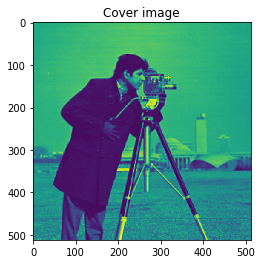

In [2]:
img1 = cv2.imread('../input/Cameraman.png',cv2.IMREAD_GRAYSCALE)
row,col =img1.shape
print('size of original image', row,col)

img2 = img1.copy()


plt.title('Cover image')
plt.imshow(img1)

#cv2.imshow("R_Channel",img_r_c2) # For A Channel (Here's what You need)
#cv2.waitKey(0)

computing dct of gray cover image

In [3]:
#computing dct of gray cover
img_fl = np.float32(img2)/255.0  # float conversion/scale
#img_dct = cv2.dct(img_fl)           # the dct
img_dct = dct(img_fl , 2 , norm='ortho') 
print(img_dct)

[[ 1.5094651e+01  1.9724594e-01 -8.7101442e-01 ...  3.7071332e-03
  -2.1973252e-03  2.6217103e-04]
 [ 1.5108863e+01  1.8691707e-01 -8.6066008e-01 ...  2.3447126e-03
  -1.1255443e-03  6.1300471e-03]
 [ 1.5123421e+01  1.6396114e-01 -8.4683198e-01 ...  8.0639683e-03
   1.1585951e-03  2.9676035e-03]
 ...
 [ 9.6509676e+00 -9.1200650e-01 -3.3128567e-02 ...  6.6247284e-03
  -7.0645763e-03  1.1379093e-02]
 [ 9.6767912e+00 -9.0874314e-01 -6.0857134e-03 ...  8.0646873e-03
  -2.1736620e-03  2.8079152e-03]
 [ 9.6617126e+00 -9.1235071e-01 -3.7641216e-02 ... -9.4798207e-04
  -6.1853975e-03  6.5472126e-03]]


size of secret 64 64


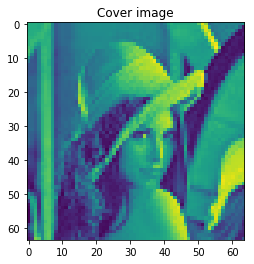

In [4]:
img_sec1 = cv2.imread('../input/lena_re.jpg',cv2.IMREAD_GRAYSCALE)
row1,col1 =img_sec1.shape
print('size of secret', row1,col1)

img_sec2 = img_sec1.copy()


plt.title('Cover image')
plt.imshow(img_sec1)

Brief Steps for stego:
embedSecretToJpeg(pixels, secret, fileout) {
    blocks = splitBlocks(pixels);
    coeffs = dct(blocks);
    modified_coeffs = embedSecret(coeffs, secret);
    saveCoefficients(modified_coeffs, fileout);
}

Computing DCT of secret image

In [5]:
img_sec_fl = np.float32(img_sec2)/255.0  # float conversion/scale
#print(imf)
#img_sec_dct = cv2.dct(img_sec_fl)           # the dct
img_sec_dct = dct(img_sec_fl , 2 , norm='ortho') 
#print(img_sec_dct)

Assigning weight to embed secret image in cover image

In [18]:
#weight = 0.5
weight = 0.1
img_dct_recreate = img_dct.copy()
#print(img_dct_recreate.shape)

img_dct_recreate[row-row1:row,col-col1:col] =   img_dct_recreate[row-row1:row,col-col1:col]  + weight *  img_sec_dct       
print(img_dct_recreate.shape)

(512, 512)


In [7]:
#img_dct_inv = cv2.dct(img_dct_recreate,cv2.DCT_INVERSE)
img_dct_inv = idct(img_dct_recreate, 2 , norm='ortho')

#print(img_dct_inv)

In [8]:
img_inv_int =  np.uint8(img_dct_inv*255)
print(img_inv_int)

[[156 157 159 ... 150 150 150]
 [155 157 157 ... 151 151 151]
 [157 157 155 ... 153 151 151]
 ...
 [122 117 129 ... 125 111 110]
 [120 117 132 ... 127 111 108]
 [124 117 129 ... 124 109 112]]


In [9]:
cv2.imwrite('../output/Stego_cameraman_one.jpg' , img_inv_int)

True

# EXTRACT

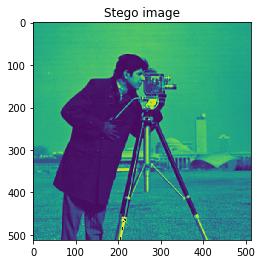

In [11]:
img_merge = cv2.imread('../output/Stego_cameraman_one.jpg',cv2.IMREAD_GRAYSCALE)
plt.title('Stego image')
plt.imshow(img_merge)

In [12]:
#Find DCT of stego image(combined with secret image)
img_merge_fl = np.float32(img_merge)/255.0  # float conversion/scale

img_merge_dct = dct(img_merge_fl , 2 , norm='ortho') 

In [13]:
dct_diff = img_merge_dct - img_dct

dct_diff_div = dct_diff/weight

dct_diff_div_crop = dct_diff_div[row-row1:row,col-col1:col]
#dct_diff_div_crop = dct_diff_div[448:512,448:512]
print(dct_diff_div_crop.shape)

(64, 64)


In [14]:
img_ex_sec_inv = idct(dct_diff_div_crop, 2 , norm='ortho')
print(img_ex_sec_inv)

[[0.6072677  0.5175981  0.52640873 ... 0.6133004  0.47159618 0.45867985]
 [0.56689477 0.5667327  0.54874283 ... 0.5312717  0.39816162 0.28077722]
 [0.54429764 0.49666333 0.5622091  ... 0.44933477 0.27796385 0.26603717]
 ...
 [0.20067763 0.29515353 0.6306505  ... 0.35409448 0.27574006 0.2638482 ]
 [0.16072594 0.2917084  0.6690285  ... 0.32246283 0.16626349 0.35063803]
 [0.23821288 0.17696533 0.66262114 ... 0.2968225  0.18237388 0.384556  ]]


In [15]:
img_ex_sec_inv_int = np.uint8(img_ex_sec_inv*255)
cv2.imwrite('../output/extract_secret_cameraman.jpg' , img_ex_sec_inv_int)

True

$$MSE = \frac{\Sigma \Sigma(In - Out)^2}{MN}$$


M and N are the dimensions of the image

In [16]:
mse =   ((img_sec1 - img_ex_sec_inv_int)**2).mean(axis=None)
print('Mean square error between input secret image and extracted secret image= ', mse)

Mean square error between input secret image and extracted secret image=  80.138916015625


In [17]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return(20 * math.log10(PIXEL_MAX / math.sqrt(mse)))

d=psnr(img_sec1,img_ex_sec_inv_int)
print('Peak signal-to-noise ratio is:' , d)

Peak signal-to-noise ratio is: 29.092368971362955
